<a href="https://colab.research.google.com/github/Alpeshpatel03434/Data-Science/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##   AIM : Logistic Regression

### Problems of Binary/MultiClass Classification like: Sales prediction of a company / Titanic Passenger Death Prediction 

### Dataset :  Loan Status

### Link :  https://drive.google.com/file/d/188bNwLoEJM5UXRYRnPhMbIxVZ1GEHEQI/view?usp=sharing

### import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Read csv file
loan_df = pd.read_csv("loan_status.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Ys,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Shape of datasat
loan_df.shape

(614, 13)

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


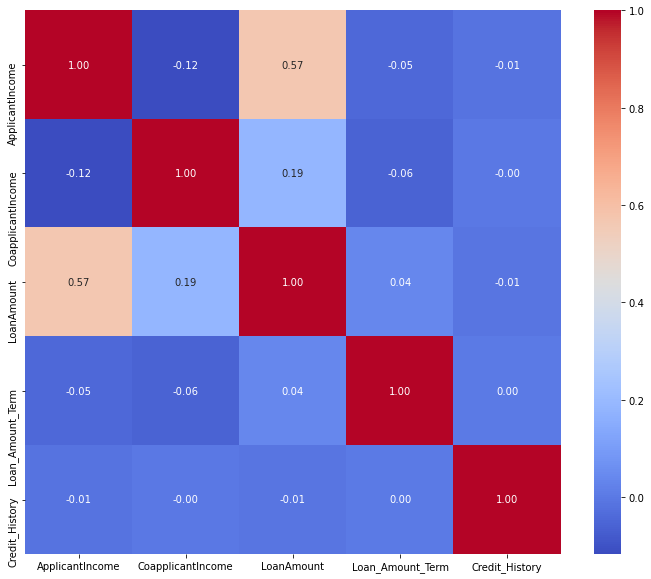

In [ ]:
# heatmap plot correlation of all independent variable

plt.figure(figsize=(12,10))
sns.heatmap(loan_df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status' ]].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

### Misiing value care

In [ ]:
# cheack missing value
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           16
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Missing value fill with its mode
loan_df['Gender'] = loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])
loan_df['Married'] = loan_df['Married'].fillna(loan_df['Married'].mode()[0])
loan_df['Dependents'] = loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mode()[0])
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0])
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0])

In [ ]:
# cheack missing value
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_df.shape

(614, 13)

### Encoding catagorical variable

In [ ]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
from sklearn import preprocessing

loan_df["Loan_ID"] = preprocessing.LabelEncoder().fit_transform(loan_df["Loan_ID"])
loan_df["Gender"] = preprocessing.LabelEncoder().fit_transform(loan_df["Gender"])
loan_df["Married"] = preprocessing.LabelEncoder().fit_transform(loan_df["Married"])
loan_df["Education"] = preprocessing.LabelEncoder().fit_transform(loan_df["Education"])
loan_df["Self_Employed"] = preprocessing.LabelEncoder().fit_transform(loan_df["Self_Employed"])
loan_df["Property_Area"] = preprocessing.LabelEncoder().fit_transform(loan_df["Property_Area"])
loan_df["Loan_Status"] = preprocessing.LabelEncoder().fit_transform(loan_df["Loan_Status"])

In [ ]:
loan_df['Dependents'] = loan_df['Dependents'].replace(['3+'],'3')
loan_df["Dependents"] = loan_df["Dependents"].astype('int64')

In [ ]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,2,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Split dependent and independent data

In [ ]:
X = loan_df.iloc[:, :-1].values
y = loan_df.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Logistic Regression Model  train using train set

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_re = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\alpes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Predict test set using our Logistic Regression model

In [ ]:
y_pred = logistic_re.predict(X_test)

In [ ]:
# Predicted values
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

## Model Measurements

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

CM = confusion_matrix(y_test, y_pred)
print(CM)
accuracy_score(y_test, y_pred)

[[15 18]
 [ 2 88]]


0.8373983739837398

###  Confusion Matrix TP,TN,FP,FN

In [ ]:
# True - negative, positive, False - Positive, negative 
TN, FP, FN, TP = CM.ravel()

In [ ]:
print("True Positives(TP) = ", TP)

True Positives(TP) =  88


In [ ]:
print("True Negatives(TN) = ", TN)

True Negatives(TN) =  15


In [ ]:
print("False Positives(FP) = ", FP)

False Positives(FP) =  18


In [ ]:
print("False Negative(FN) = ", FN)

False Negative(FN) =  2


### Precision - Recall

In [ ]:
Precision = TP/ (TP + FP)

print("Precision = ", Precision)

Precision =  0.8301886792452831


In [ ]:
Recall = TP/ (TP + FN)

print("Recall = ", Recall)

Recall =  0.9777777777777777


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.83')

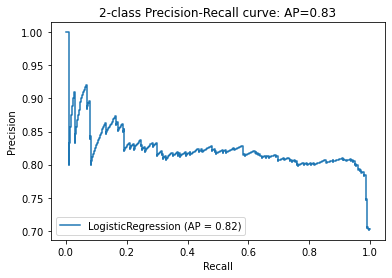

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(logistic_re, X_train, y_train)
disp.ax_.set_title('2-class Precision-Recall curve: ' 'AP={0:0.2f}'.format(Precision))

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.83')

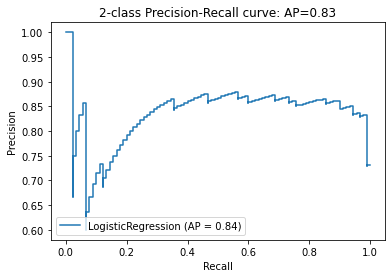

In [ ]:

disp = plot_precision_recall_curve(logistic_re, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ' 'AP={0:0.2f}'.format(Precision))

###  F1 - Score

In [ ]:
F1_Score = TP/ (TP + 0.5*(FP + FN)) 

print("F1-Score = ", F1_Score)

F1-Score =  0.8979591836734694


#### Accuracy Score

In [ ]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)

print("Accuracy = ", Accuracy)

Accuracy =  0.8373983739837398


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8373983739837398

In [ ]:
#  Logistic Regression our model Score

logistic_re.score(X, y)

0.8094462540716613

### Classification_report

In [ ]:
from sklearn import metrics

print (metrics.classification_report(y_test, logistic_re.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



#### In above Classification_report  classify our Logistic Regression Model f1-score, errors and  accuracy of model prediction.

### Conclusion and Observations

####  loan_status data sat we have number of candidate data who applied loan . Using logistic regression we can classify and train model. that model predict and classify with accuracy = 0.84 